<a href="https://colab.research.google.com/github/h-a-r-s-h-p/Linear-Regression/blob/main/error%20vs%20input_dimension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import sklearn
from sklearn.model_selection import KFold
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [42]:
target_dimension=1
# input_dimension=10
no_of_instances=500

In [43]:
def genDataset():            #data generator with 100 input dimension and 1000 instances
    inputs=np.random.rand(1000,100)*1000
    weight= np.random.rand(target_dimension,100)
    bias= np.random.rand(1000,target_dimension)
    # print("inputs shape= ", inputs.shape)
    # print(" weight shape= ",weight.shape)
    # print("bias shape= ", bias.shape)
    targets= inputs @ weight.T + bias
    targets=np.reshape(targets,1000)
    targets=targets+np.random.normal(0,30,len(targets))
    data=pd.DataFrame(targets,columns=['y'])                     # creates a table like dataframe with 1 column 'y'
    for i in range(100):
        temp=[inputs[x][i] for x in range(1000)]
        temp=pd.DataFrame(temp)
        data['x%d'%i]=temp
    
    # plt.plot(data['x0'],data['y'],'.')
    # plt.show()
    print(data.head())                                           # head() takes as parameter an integer(k) and returns first k elements of data, by default it is 5
    return data

In [44]:
Large_data=genDataset()

              y          x0          x1  ...         x97         x98         x99
0  25604.718300  469.620751  563.115042  ...   67.081659  221.252633  275.097493
1  26049.811546  960.310686  123.686781  ...  269.190335   58.626263  968.123807
2  27555.647453  206.406166   41.929980  ...  324.399966  982.838724  428.026440
3  26472.236462  395.832141  843.010740  ...  985.115745  832.225528  337.971526
4  25557.493439  114.699822  489.704617  ...  293.848291  451.639171  107.925576

[5 rows x 101 columns]


In [45]:
# data=genDataset(10,1)
# plt.plot(data['x0'],data['y'],'.')
# plt.show()
def KFoldLR(n,d):
    data=Large_data.head(n)
    # print(data.shape)
    in_col=[]                                           #input columns's names
    for i in range(d):
        in_col.append('x%d'%i)
    linreg=LinearRegression()
    error=cross_val_score(linreg,data[in_col],data['y'],scoring='neg_mean_squared_error')   #returns a ndarray of length no. of folds which contains average for each fold
    error=-1*error
    # print(error)
    avg_error=np.average(error)
    plt.plot(d,avg_error,'.')


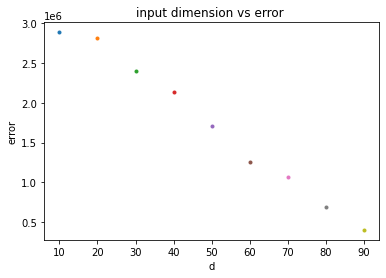

In [46]:
plt.xlabel("d")
plt.ylabel("error")
plt.title("input dimension vs error ")
for input_dimension in range(10,100,10):
    KFoldLR(no_of_instances,input_dimension)
plt.show()

In [ ]:
x=np.array([[1],[2],[3]])*3
x

array([[3],
       [6],
       [9]])

In [ ]:

import numpy as np
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import KFold

# no_instances=100
input_dimension=1
target_dimension=1
batchsize=5
learning_rate=0.001
no_epochs=10
no_folds=10

loss_fn=F.mse_loss

# print("no. of instances= ",no_instances)
print("input dimension= ",input_dimension)
print("target dimension= ",target_dimension)
print("learning rate= ",learning_rate)
print("no. of epochs = ",no_epochs)

def genDataset(n,d):
    inputs, targets = make_regression(n_samples=n, n_features=d, n_targets=target_dimension, noise=0.1)
    return inputs,targets

def teach(model,opt,train_dl):    #training our model
    for epoch in range(no_epochs):
        for xb,yb in train_dl:
            print("\nlen of train_dl[0]=",len(xb))
            pred=model(xb)
            loss=loss_fn(pred,yb)
            loss.backward()
            opt.step()
            opt.zero_grad()
            print("weight = ",model.weight)
            print("bias= ",model.bias)
        print("error in epoch ", epoch," = ",loss.item())
        print("\n")

    

def LR(n,d):
    inputs,targets=genDataset(n,d)
    
    inputs=torch.from_numpy(inputs).float()
    targets=torch.from_numpy(targets).float()
    targets=targets.view(n,1)                       # converting to n rows and 1 column
    
    print("inputs size= ",inputs.shape)
    print("targets size= ",targets.shape)
    train_ds=TensorDataset(inputs,targets)                      #makes tuple of inputs and target tensors
    print("train_ds[0:3]= ",train_ds[0:3])                      #firsst prints 3 input tensor then 3 target tensor

    model=nn.Linear(d,target_dimension)                         #Linear regression model from d dimension to target_dimension
    print("weight before training= ",model.weight)
    print("bias before training= ", model.bias)
    kfold=KFold(no_folds,True,1)
    opt=torch.optim.SGD(model.parameters(),lr=learning_rate)    #weight and bias optimizer according to stochastic gradient descent
    avg_loss=0
    for train,test in kfold.split(train_ds):
        temp=train_ds[train]
        print("train_ds shape= ",temp[0].shape)
        train_dl=DataLoader(temp,batch_size=batchsize,shuffle=True)       #Creating shuffled batches of data
        val_fold=train_ds[test]
        print("\nlength of dataloader= ",len(train_dl))
        print("\n")
        teach(model,opt,train_dl)
        
        val_pred=model(val_fold[0])
        error=loss_fn(val_pred,val_fold[1])
        avg_loss=avg_loss+error.item()
    # print("check1")
    print("error for n= ",n, avg_loss/no_folds)
    plt.scatter(n,avg_loss/no_folds,s=10)
    # print("check2")

LR(100,1)
# plt.xlabel(" n")
# plt.ylabel("error")
# plt.title("error vs no. of instances")
# for no_instances in range(100,1000,100):
#     LR(no_instances,input_dimension)
# plt.show()

In [ ]:
genDataset(100,2)